* sampling / aliasing
* mag/phase
* key transforms: tone/impulse, impulse train, sinc/rectangle
* linear vs dB
* real vs complex spectrums/symmetries
* even vs odd spectrums/symmetries
* orthogonality of complex exponentials --> sinc
* discontinuities --> many frequencies


In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U numpy scipy matplotlib ipywidgets ipympl

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached ipympl-0.9.3-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metad

In [2]:
%matplotlib widget

import ipywidgets as widgets
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

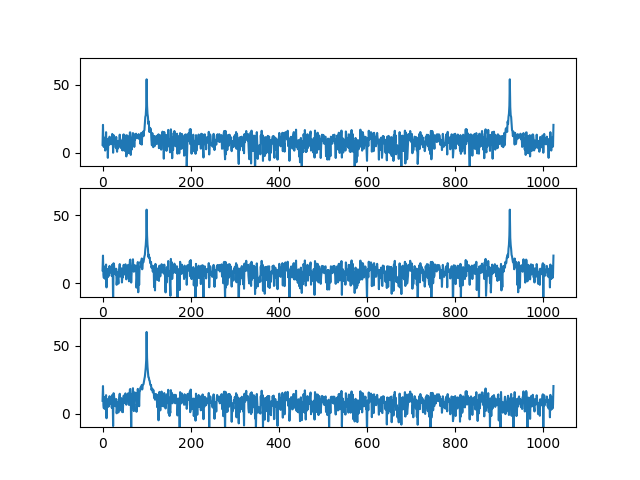

In [13]:
N_fft = 32

ts_cont = np.linspace(0.0, 1.0, 10*N_fft)
ts_samp = np.linspace(0.0, 1.0, N_fft)


fs = np.linspace(0.0, N_fft-1.0, N_fft)

noise = 0.1*np.random.randn(ts.size)

sig_1 = np.sin(2*np.pi*100.0*ts) + noise
sig_2 = np.cos(2*np.pi*100.0*ts) + noise
sig_3 = np.exp(1j*2*np.pi*100.0*ts) + noise

fft_1 = sp.fft.fft(sig_1, 1024)
fft_2 = sp.fft.fft(sig_2, 1024)
fft_3 = sp.fft.fft(sig_3, 1024)

fig = plt.figure()
ax_1 = fig.add_subplot(3, 1, 1)
ax_1.plot(fs, 20*np.log10(np.abs(fft_1)))
ax_1.set_ylim(-10, +70)

ax_2 = fig.add_subplot(3, 1, 2)
ax_2.plot(fs, 20*np.log10(np.abs(fft_2)))
ax_2.set_ylim(-10, +70)

ax_3 = fig.add_subplot(3, 1, 3)
ax_3.plot(fs, 20*np.log10(np.abs(fft_3)))
ax_3.set_ylim(-10, +70)

plt.show()